## Drive path

First things first - let's make sure your drive path is set up appropriately. All these files are already saved in the AWS directory drive path below.

In [1]:
drive_path = '/data/dynamic-brain-workshop/modeling'

Import some useful packages.

In [2]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import json
import matplotlib
#matplotlib.rcParams.update({'font.size': 15})

## 1. Plotting spikes

Let us load spikes from one simulation.

First, provide a file name with spikes.  This file contains two columns -- cell id and spike time.  Each time a cell spikes, a new row with the cell id and the spike time is added to the file.  Because these simulations typicaly run in parallel on many cores, the rows in the spike file are typically unsorted.

Load the data into a numpy array and print the shape.

In [3]:
sim_path = 'layer4_spikes/simulations_ll2/natural_movies/'
output_path = os.path.join(drive_path, sim_path, 'output_ll2_TouchOfEvil_frames_3600_to_3750_scrbl_xy_9_sd278/')
spk_fname = os.path.join(output_path, 'spk.dat')

# Read spikes.
series = np.genfromtxt(spk_fname, delimiter=' ')
print series.shape

(174343, 2)


Now, let us make a raster plot of these spikes.

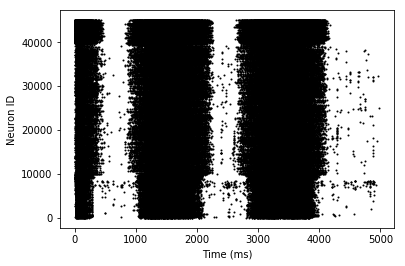

In [4]:
fig, ax = plt.subplots()

# Plot the spikes.
ax.scatter(series[:, 0], series[:, 1], s=1, c='k') #series[:, 0] are neuron IDs, and series[:, 1] are time stamps.
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Neuron ID')

## 2. Plotting firing rates.

We can obtain firing rates from the spikes that we loaded above.  However, firing rates have been already computed in most of the simulations, and can be simply loaded from files called "tot_f_rate.dat".

Let us load the data from such a file into a numpy array and print its shape. 

In [5]:
rate_fname = os.path.join(output_path, 'tot_f_rate.dat') # Reuse the same path from above.

# Read firing rates.
f_rate = np.genfromtxt(rate_fname, delimiter=' ')
print f_rate.shape

(45000, 3)


As we can see, the file contains three columns.  They are the cell id, the firing rate computed for the time that the stimulus was presented, and the firing rate computed for the total time of the simulation (which typically includes a 500 ms interval of gray screen in the beginning).

Most often, we need to use column 1 and 2.  Note that, unlike the spike file, the rows here are unique in terms of cell ids (one row for each cell id) and are sorted in order of cell ids.

Let us now plot the firing rates of all the cells (as we can see above, 45,000 of them).

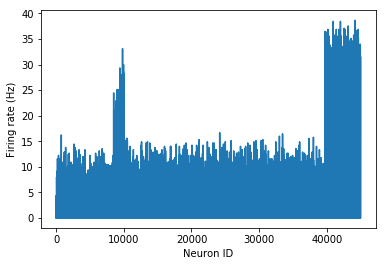

In [6]:
plt.plot(f_rate[:, 0], f_rate[:, 1])
plt.xlabel('Neuron ID')
plt.ylabel('Firing rate (Hz)')

## 3. Cell properties.

What are the cells in the system?  We can actually access them.  Let us load the information about the cells into a pandas dataframe and look at the contents.

In [7]:
cells_file = os.path.join(drive_path, 'layer4_spikes/build/ll2.csv')
cells_db = pd.read_csv(cells_file, sep=' ')
cells_db.head(n=10)

,index,type,x,y,z,tuning,morphology,cell_par
0,0,Scnn1a,28.753,161.705,5.132,0.0,/data/mat/antona/cell_models/395830185/Scnn1a-...,/data/mat/antona/cell_models/395830185/4723637...
1,1,Scnn1a,90.095,-95.061,-41.935,0.0972972972973,/data/mat/antona/cell_models/395830185/Scnn1a-...,/data/mat/antona/cell_models/395830185/4723637...
2,2,Scnn1a,94.143,337.613,-42.459,0.194594594595,/data/mat/antona/cell_models/395830185/Scnn1a-...,/data/mat/antona/cell_models/395830185/4723637...
3,3,Scnn1a,329.325,-184.809,-5.583,0.291891891892,/data/mat/antona/cell_models/395830185/Scnn1a-...,/data/mat/antona/cell_models/395830185/4723637...
4,4,Scnn1a,-326.973,23.851,2.608,0.389189189189,/data/mat/antona/cell_models/395830185/Scnn1a-...,/data/mat/antona/cell_models/395830185/4723637...
5,5,Scnn1a,-225.722,-190.937,21.341,0.486486486486,/data/mat/antona/cell_models/395830185/Scnn1a-...,/data/mat/antona/cell_models/395830185/4723637...
6,6,Scnn1a,33.756,-336.600,-22.009,0.583783783784,/data/mat/antona/cell_models/395830185/Scnn1a-...,/data/mat/antona/cell_models/395830185/4723637...
7,7,Scnn1a,-225.953,-26.266,-10.029,0.681081081081,/data/mat/antona/cell_models/395830185/Scnn1a-...,/data/mat/antona/cell_models/395830185/4723637...
8,8,Scnn1a,-108.859,359.466,-47.802,0.778378378378,/data/mat/antona/cell_models/395830185/Scnn1a-...,/data/mat/antona/cell_models/395830185/4723637...
9,9,Scnn1a,84.676,205.233,-34.492,0.875675675676,/data/mat/antona/cell_models/395830185/Scnn1a-...,/data/mat/antona/cell_models/395830185/4723637...


As you can see, this file contains information about each cell's ID, coordinates, type, and other assigned properties.

Let us now plot the coordinates of the cells by type.

Cell types:  ['LIF_exc' 'LIF_inh' 'Nr5a1' 'PV1' 'PV2' 'Rorb' 'Scnn1a']


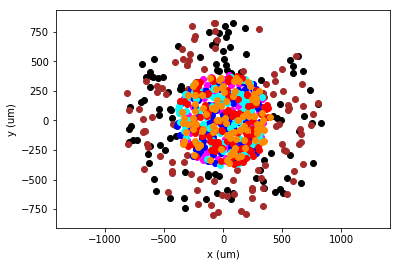

In [8]:
# We'll use this colors to denote cell types.
types_color_list = ['black', 'brown', 'magenta', 'blue', 'cyan', 'red', 'darkorange']

cell_types = np.unique(cells_db['type'].values)
print 'Cell types: ', cell_types

for i_type, tmp_type in enumerate(cell_types):
    tmp_db = cells_db[cells_db['type']==tmp_type]
    # Use only 100 cells of each type for plotting, otherwise the plot is too messy.
    x = tmp_db['x'].values[:100]
    y = tmp_db['y'].values[:100]
    plt.scatter(x, y, c=types_color_list[i_type])
    plt.axis('equal')
plt.xlabel('x (um)')
plt.ylabel('y (um)')

Apparently, the cells are distributed within concentric circles in the x and y dimensions.

## 4. Plotting spikes by cell type.

Let us now combine information about spikes and cells into a plot where same colors as aboe are used.

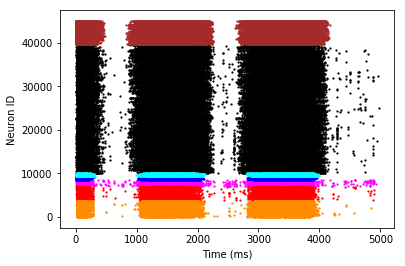

In [9]:
for i_type, tmp_type in enumerate(cell_types):
    gids = cells_db[cells_db['type'] == tmp_type]['index'].values # 'Global IDs', or gids of the neurons of this type.
    # Use a numpy trick to find indices of all elements (here, neuron IDs from 'series') that belong to the array 'gids'.
    tf_mask = np.in1d(series[:, 1], gids)
    plt.scatter(series[tf_mask, 0], series[tf_mask, 1], s=5, lw=0, facecolor=types_color_list[i_type % len(types_color_list)])
plt.xlabel('Time (ms)')
plt.ylabel('Neuron ID')

## 5. Iterating over systems and simulations.

Simulations have been performed for multiple systems (one can think of them as different mice).  Their names in this example are 'll1', 'll2', and 'll3'.  For each system, multiple visual stimuli were used, and each stimulus was presented multiple times (i.e., multiple trials).

Let us see how we can load information from such multiple trials and different systems.  As an example, we compute the average firing rate for a particular cell from multiple trials of presenting a drifting grating (with certain temporal frequency, spatial frequency, and direction of motion).  We then combine the results for all systems in one plot.  Note that the script below is relatively slow because many large files are read one after another (for practical applications, it is better to read such files once and get information for multiple cells that way, rather than working with one cell and multiple files).

System ll1, cell 10, the firing rate averaged over 10 trials of grating g8 is 7.600000 +/- 0.669328 Hz.
System ll2, cell 10, the firing rate averaged over 10 trials of grating g8 is 8.200000 +/- 0.967471 Hz.
System ll3, cell 10, the firing rate averaged over 10 trials of grating g8 is 8.000000 +/- 0.715542 Hz.


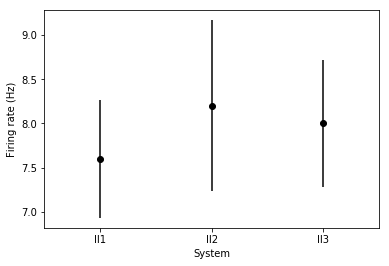

In [10]:
systems = ['ll1', 'll2', 'll3']
grating_id = 8 # Choose a grating for this example.

cell_id = 10 # This is the cell for which we will obtain the data.

N_trials = 10 # In the case of gratings, 10 trials were used.

fig, ax = plt.subplots()

for i_s, system in enumerate(systems):
    trials_rates = []
    for trial in xrange(N_trials):
        output_path = 'layer4_spikes/simulations_%s/gratings/output_%s_g%d_%d_sd278/' % (system, system, grating_id, trial)
        rate_fname = os.path.join(drive_path, output_path, 'tot_f_rate.dat')

        # Read the firing rates.
        f_rate = np.genfromtxt(rate_fname, delimiter=' ')
        # Just in case the indexing is not the same as cell IDs, use numpy to find the index of the
        # row corresponding to the ID we want.  Make sure we use just one element from what has
        # been found (it should be only one, unless there is a problem with the file we are reading).
        ind = np.where(f_rate[:, 0] == cell_id)[0][0]
        cell_f_rate = f_rate[ind, 1] # Get the firing rate for this cell.
        trials_rates.append(cell_f_rate) # Add the rate to a list.
        
    # Now, compute the mean firing rate and standard deviation for the cell.  Do that for every system.
    rate_mean = np.mean(trials_rates)
    rate_std = np.std(trials_rates)
    print 'System %s, cell %d, the firing rate averaged over %d trials of grating g%d is %f +/- %f Hz.' % (system, cell_id, N_trials, grating_id, rate_mean, rate_std)
    ax.errorbar([i_s], [rate_mean], yerr=[rate_std], marker='o', color='k')
ax.set_xlim(-0.5, 2.5)
ax.set_ylabel('Firing rate (Hz)')
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(systems)
ax.set_xlabel('System')